In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import InSituData, InSituExperiment, CACHE
import scanpy as sc
from tqdm import tqdm

## Add histological annotations

In [3]:
data_path = Path(r"E:\ColorectalCancer\analysis\crc_data_pp_rounded_all_images")

In [4]:
exp = InSituExperiment.read(data_path)
exp.load_all()

100%|██████████| 7/7 [00:55<00:00,  7.87s/it]


## Plot spatial embedding

In [5]:
from insitupy.plotting import plot_spatial
import matplotlib.pyplot as plt

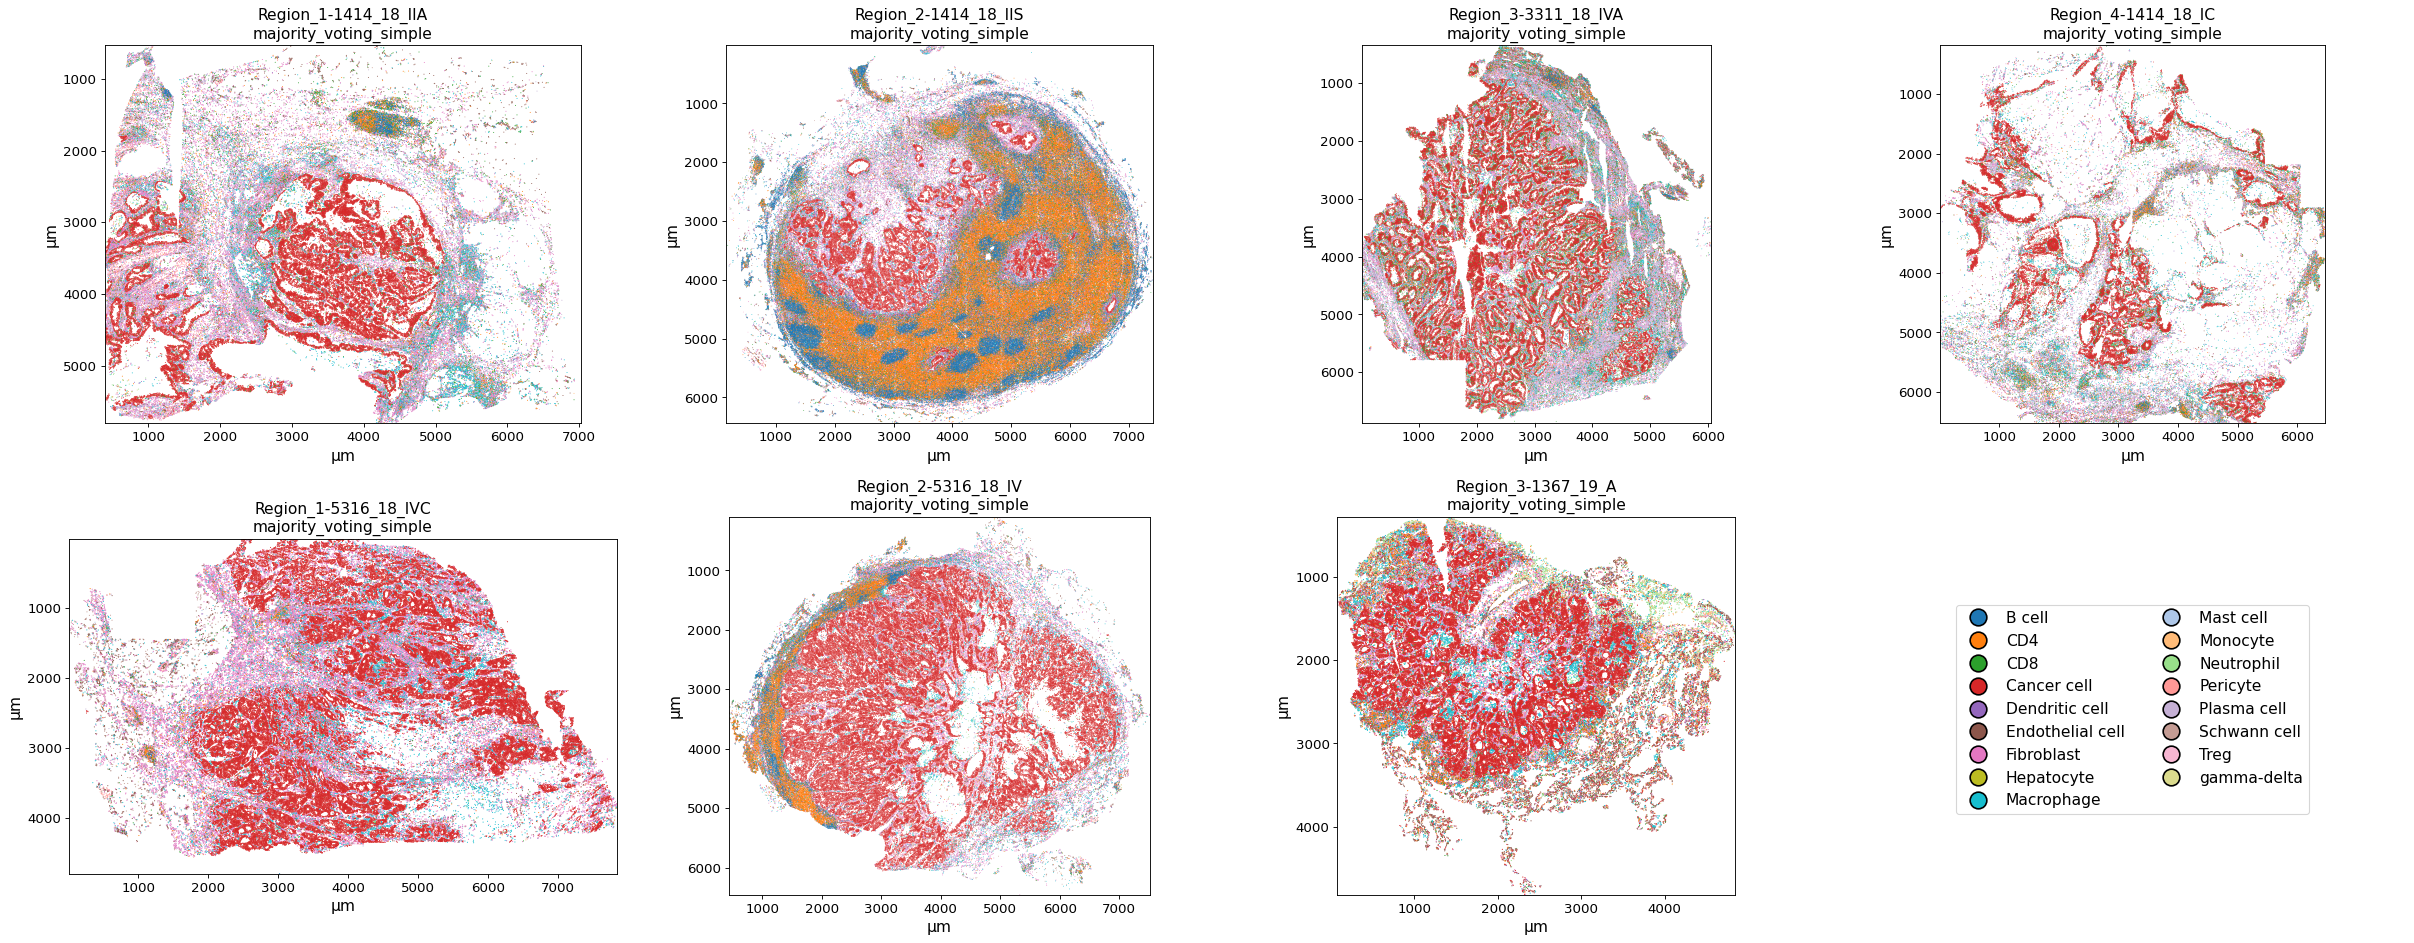

In [6]:
plot_spatial(exp, cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

## Next steps
- plot cellular composition of all datasets
- calculate differential expressed genes for each cell type and visualize them using a large grid to showcase the plotting functionalities
- annotate the tumor buds
- compare tumor buds vs non-tumor buds using differential gene expression analysis + GO term analysis
    - identify genes that are different across all samples
    - This could be also a pseudobulk case: tumor bud vs bulk tumor using all samples as replicate?
- generate a pseudobulk version of the data and visualize it as heatmap
- and visualize them on UMAP to see their location



### Add paths to QuPath annotations to `.metadata`

In [6]:
exp.append_metadata(
    new_metadata=r"E:\ColorectalCancer\annotations_Tanja\exports\import_annotations_config.xlsx"
)

C:\Users\ge37voy\Github\InSituPy\insitupy\_core\insituexperiment.py:378: UserWarning: No 'by' column provided. Metadata will be paired by order.
  warnings.warn("No 'by' column provided. Metadata will be paired by order.")


### Import annotations by iterating through he `InSituExperiment` object

In [7]:
for meta, xd in exp.iterdata():
    print(xd.sample_id)
    annotations_path = Path(meta["annotations_Tanja"])
    xd.import_annotations(
        annotations_path, keys="Tanja", scale_factor=0.2125
    )

Region_1-1414_18_IIA
Region_2-1414_18_IIS
Region_3-3311_18_IVA
Region_4-1414_18_IC
Region_1-5316_18_IVC
Region_2-5316_18_IV
Region_3-1367_19_A


In [8]:
exp.annotations

0: Region_1-1414_18_IIA
       Tanja:	119 annotations, 6 classes ('Tumor buds','Immune cells','Mucus','Tumor','Fat','Peritumoral Zone') 
1: Region_2-1414_18_IIS
       Tanja:	169 annotations, 5 classes ('Tumor buds','Tumor','Fat','Peritumoral Zone','Immune cells') 
2: Region_3-3311_18_IVA
       Tanja:	101 annotations, 3 classes ('Tumor buds','Tumor','Peritumoral Zone') 
3: Region_4-1414_18_IC
       Tanja:	165 annotations, 6 classes ('Tumor','Peritumoral Zone','Immune cells','Tumor buds','Necrosis','Mucus') 
4: Region_1-5316_18_IVC
       Tanja:	380 annotations, 8 classes ('Tumor','Tumor buds','Fat','Peritumoral Zone','Immune cells','Stroma','Vessels','Necrosis') 
5: Region_2-5316_18_IV
       Tanja:	31 annotations, 4 classes ('Tumor buds','Peritumoral Zone','Tumor','Immune cells') 
6: Region_3-1367_19_A
       Tanja:	85 annotations, 8 classes ('Tumor','Vessels','Necrosis','Tumor buds','Peritumoral Zone','Immune cells','Stroma','Adjacent normal tissue') 



In [15]:
viewer = exp.show(0)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is deprecated, please use 'border_color' instead. The argument 'edge_color' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  return func(*args, **kwargs)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is deprecated, please use 'border_color' instead. The argument 'edge_color' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  return func(*args, **kwargs)


In [6]:
from insitupy.plotting import plot_cellular_composition

Saving figure to file figures/cellcomp-one_dataset-no_annotations.pdf
Saved.


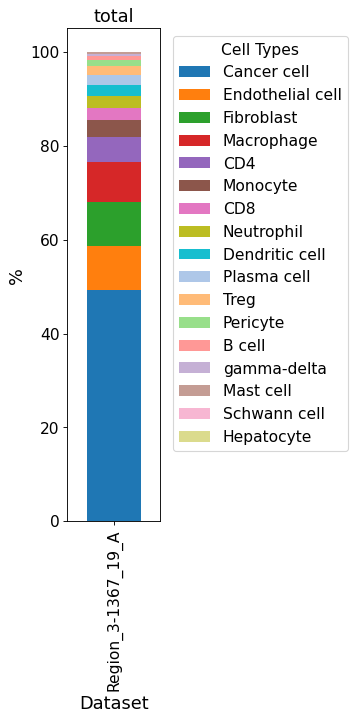

In [11]:
plot_cellular_composition(
    data=xd, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    plot_type="bar",
    savepath="figures/cellcomp-one_dataset-no_annotations.pdf"
)

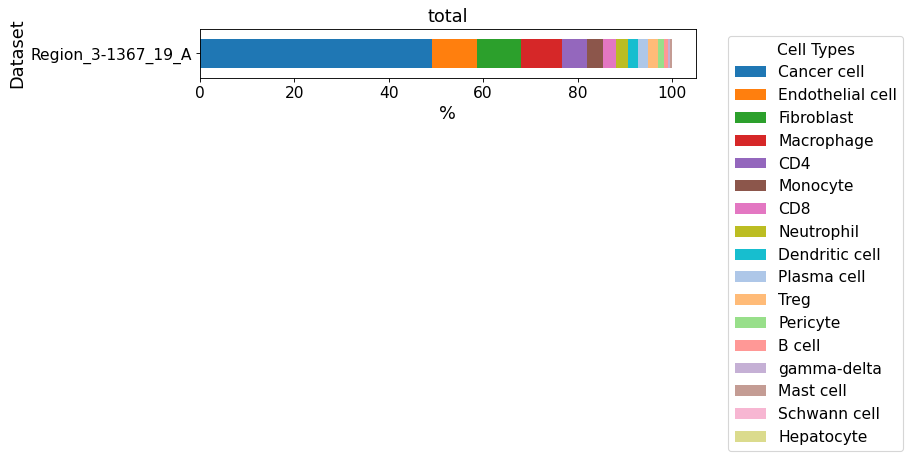

In [12]:
plot_cellular_composition(
    data=xd, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    plot_type="barh",
)

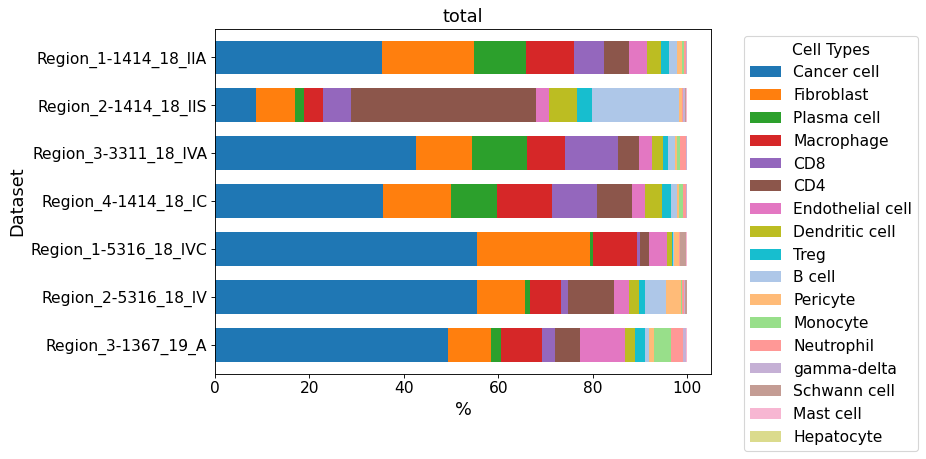

In [13]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg", plot_type="barh",
    # savepath="figures/cellcomp-all_datasets-no_annotations.pdf"
)

Saving figure to file figures/cellcomp-all_datasets-no_annotations.pdf
Saved.


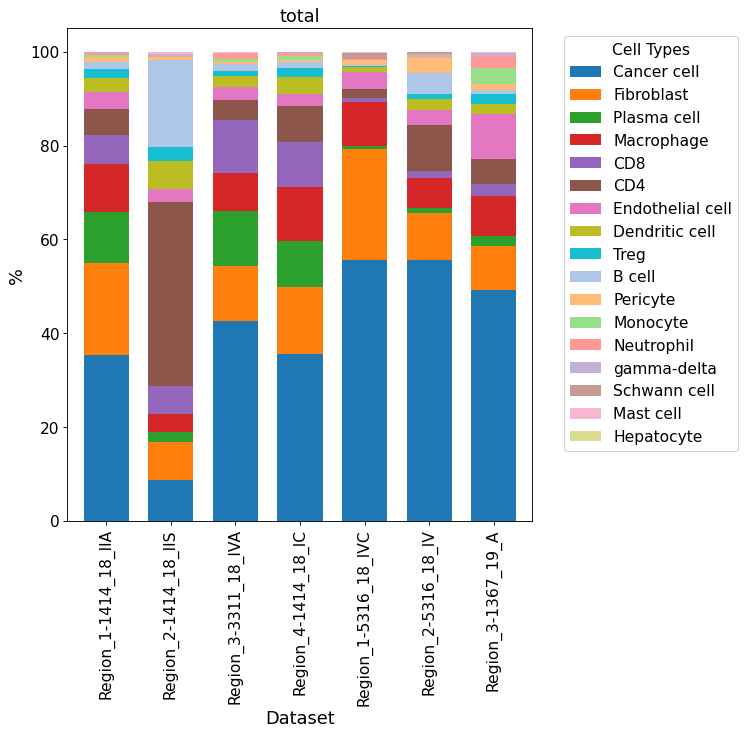

In [14]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg", plot_type="bar",
    savepath="figures/cellcomp-all_datasets-no_annotations.pdf"
)

Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 6/6 [00:04<00:00,  1.23it/s]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 5/5 [00:10<00:00,  2.17s/it]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 3/3 [00:05<00:00,  1.89s/it]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 6/6 [00:06<00:00,  1.06s/it]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 8/8 [00:11<00:00,  1.49s/it]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Using CellData from MultiCellData layer 'proseg'.
Assigning key 'Tanja'...


100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


Added results to `.cells['proseg'].matrix.obsm['annotations']
Saving figure to file figures/cellcomp-all_datasets-annotations_Tanja.pdf
Saved.


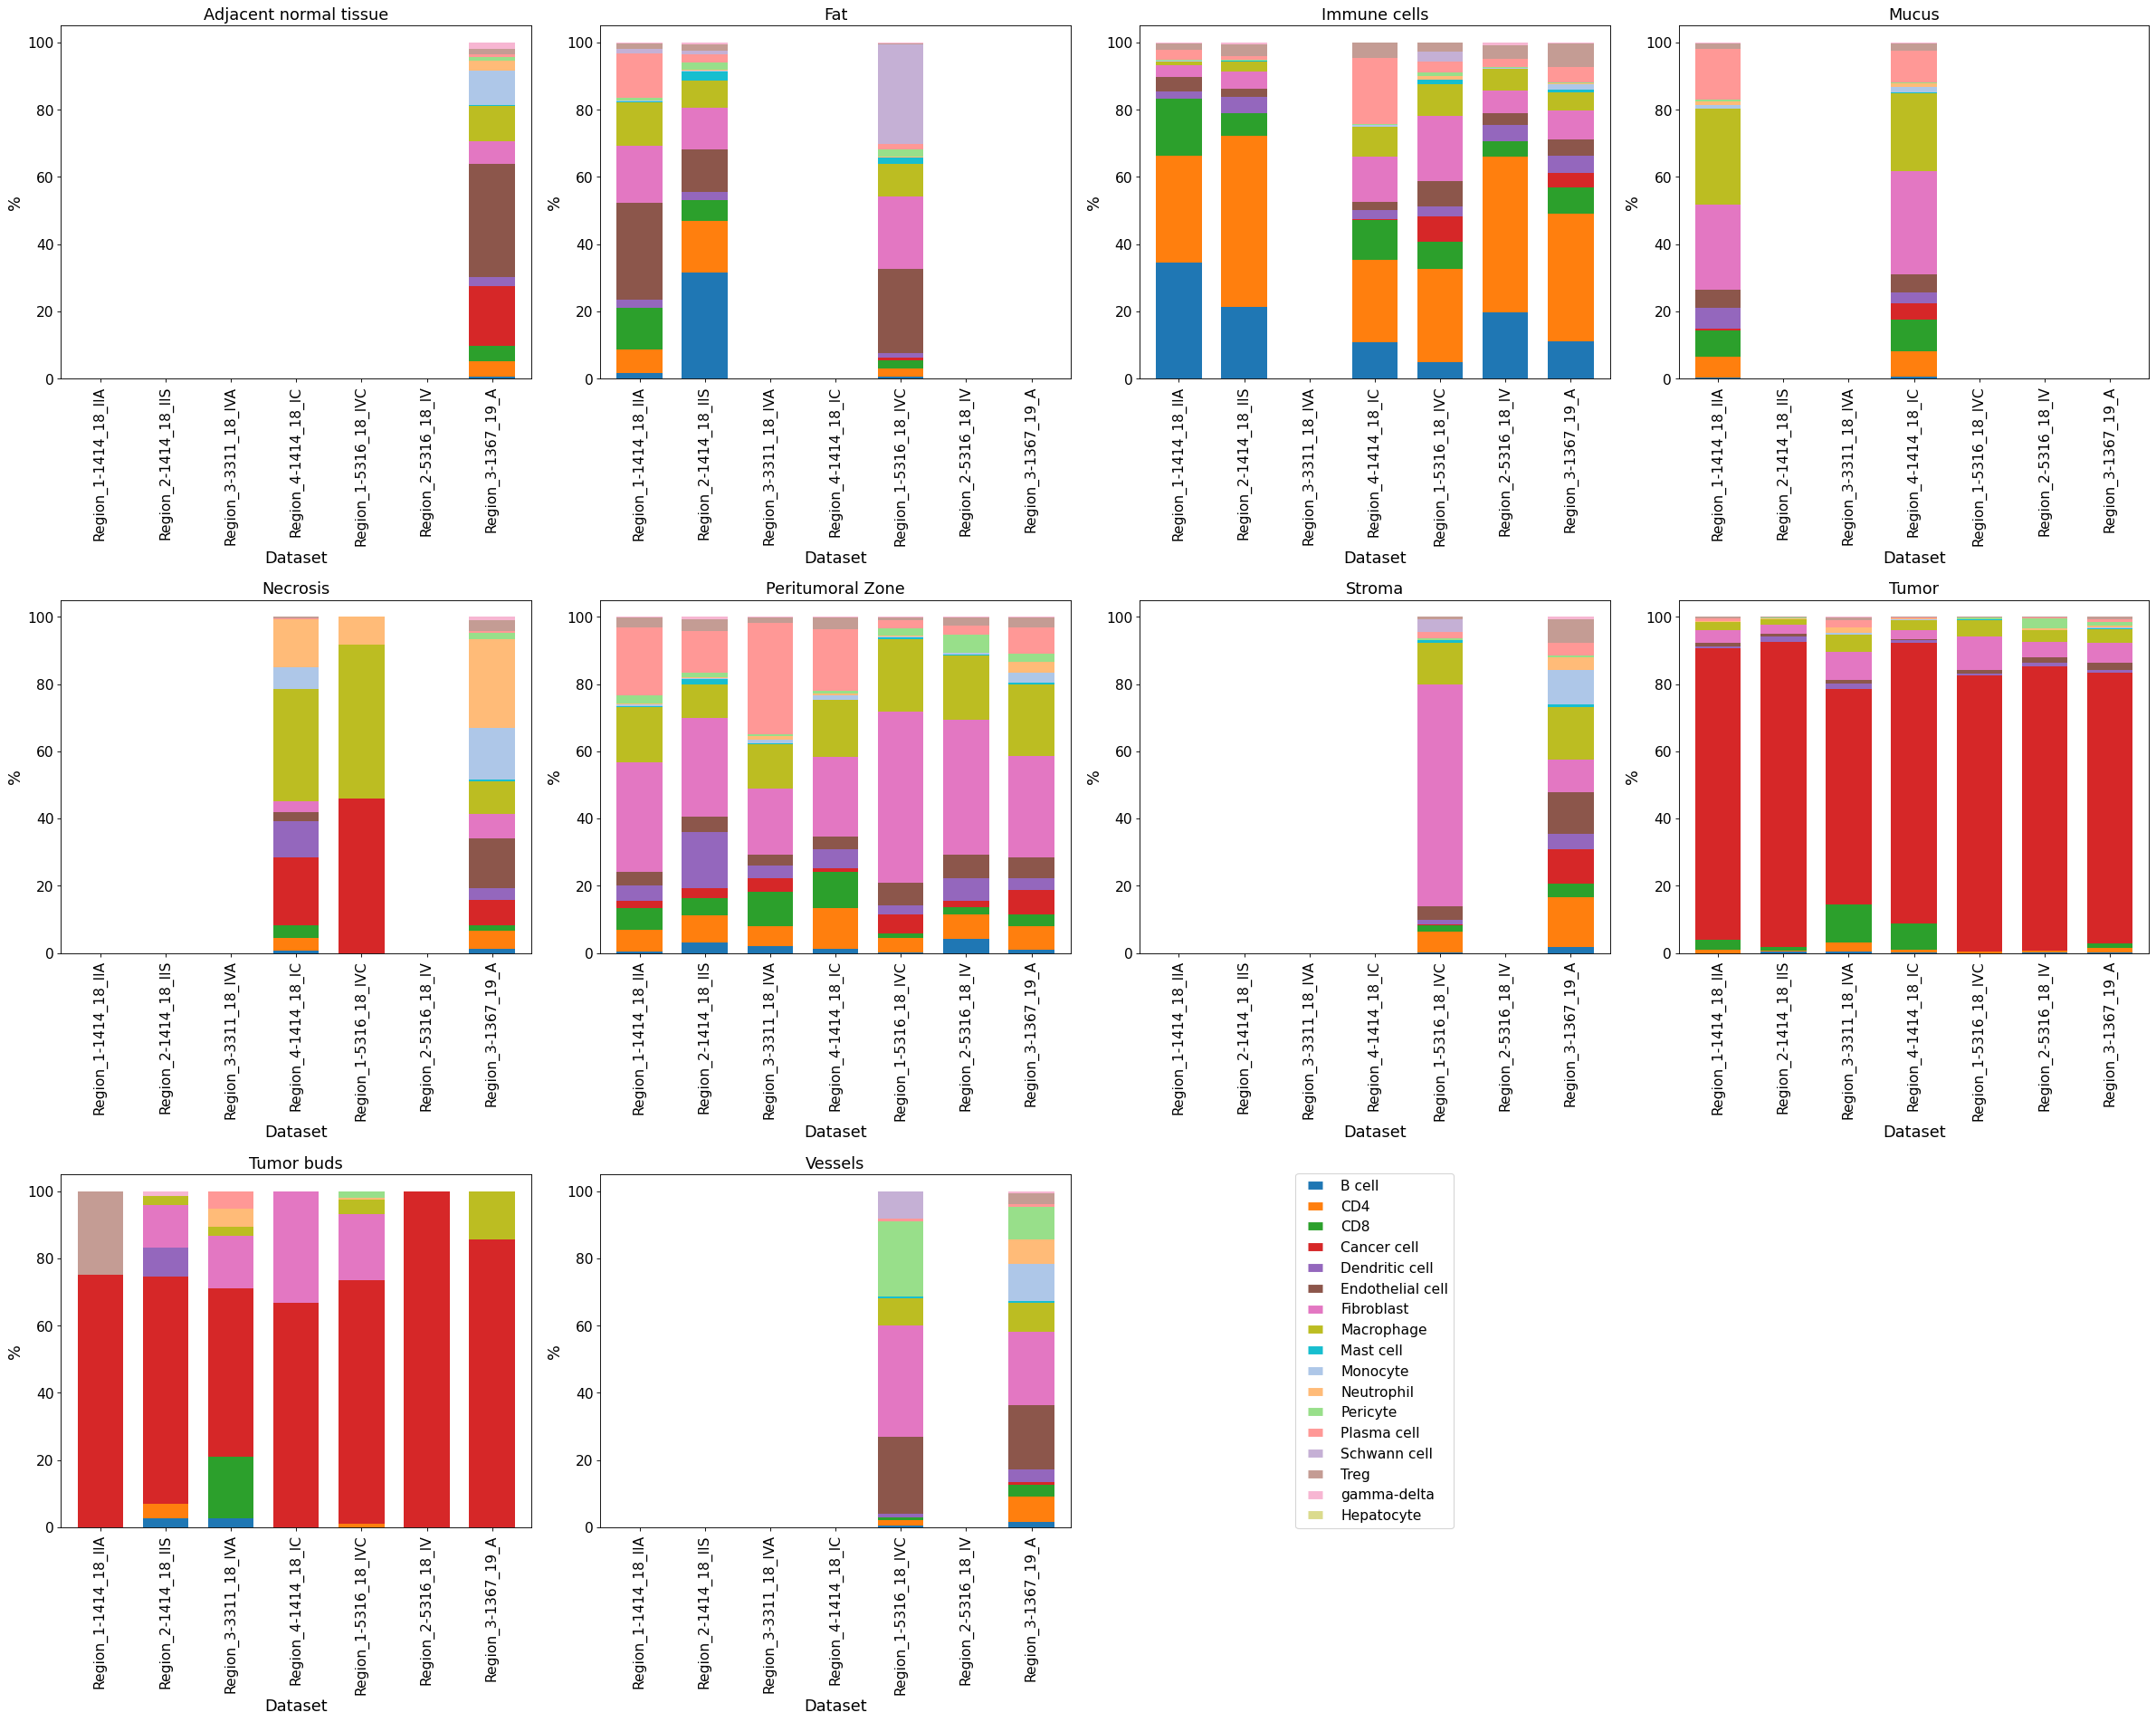

In [15]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja", modality="annotations", #max_cols=3,
    plot_type="bar",
    savepath="figures/cellcomp-all_datasets-annotations_Tanja.pdf"
)

Saving figure to file figures/cellcomp-all_datasets-annotations_Tanja_selected.pdf
Saved.


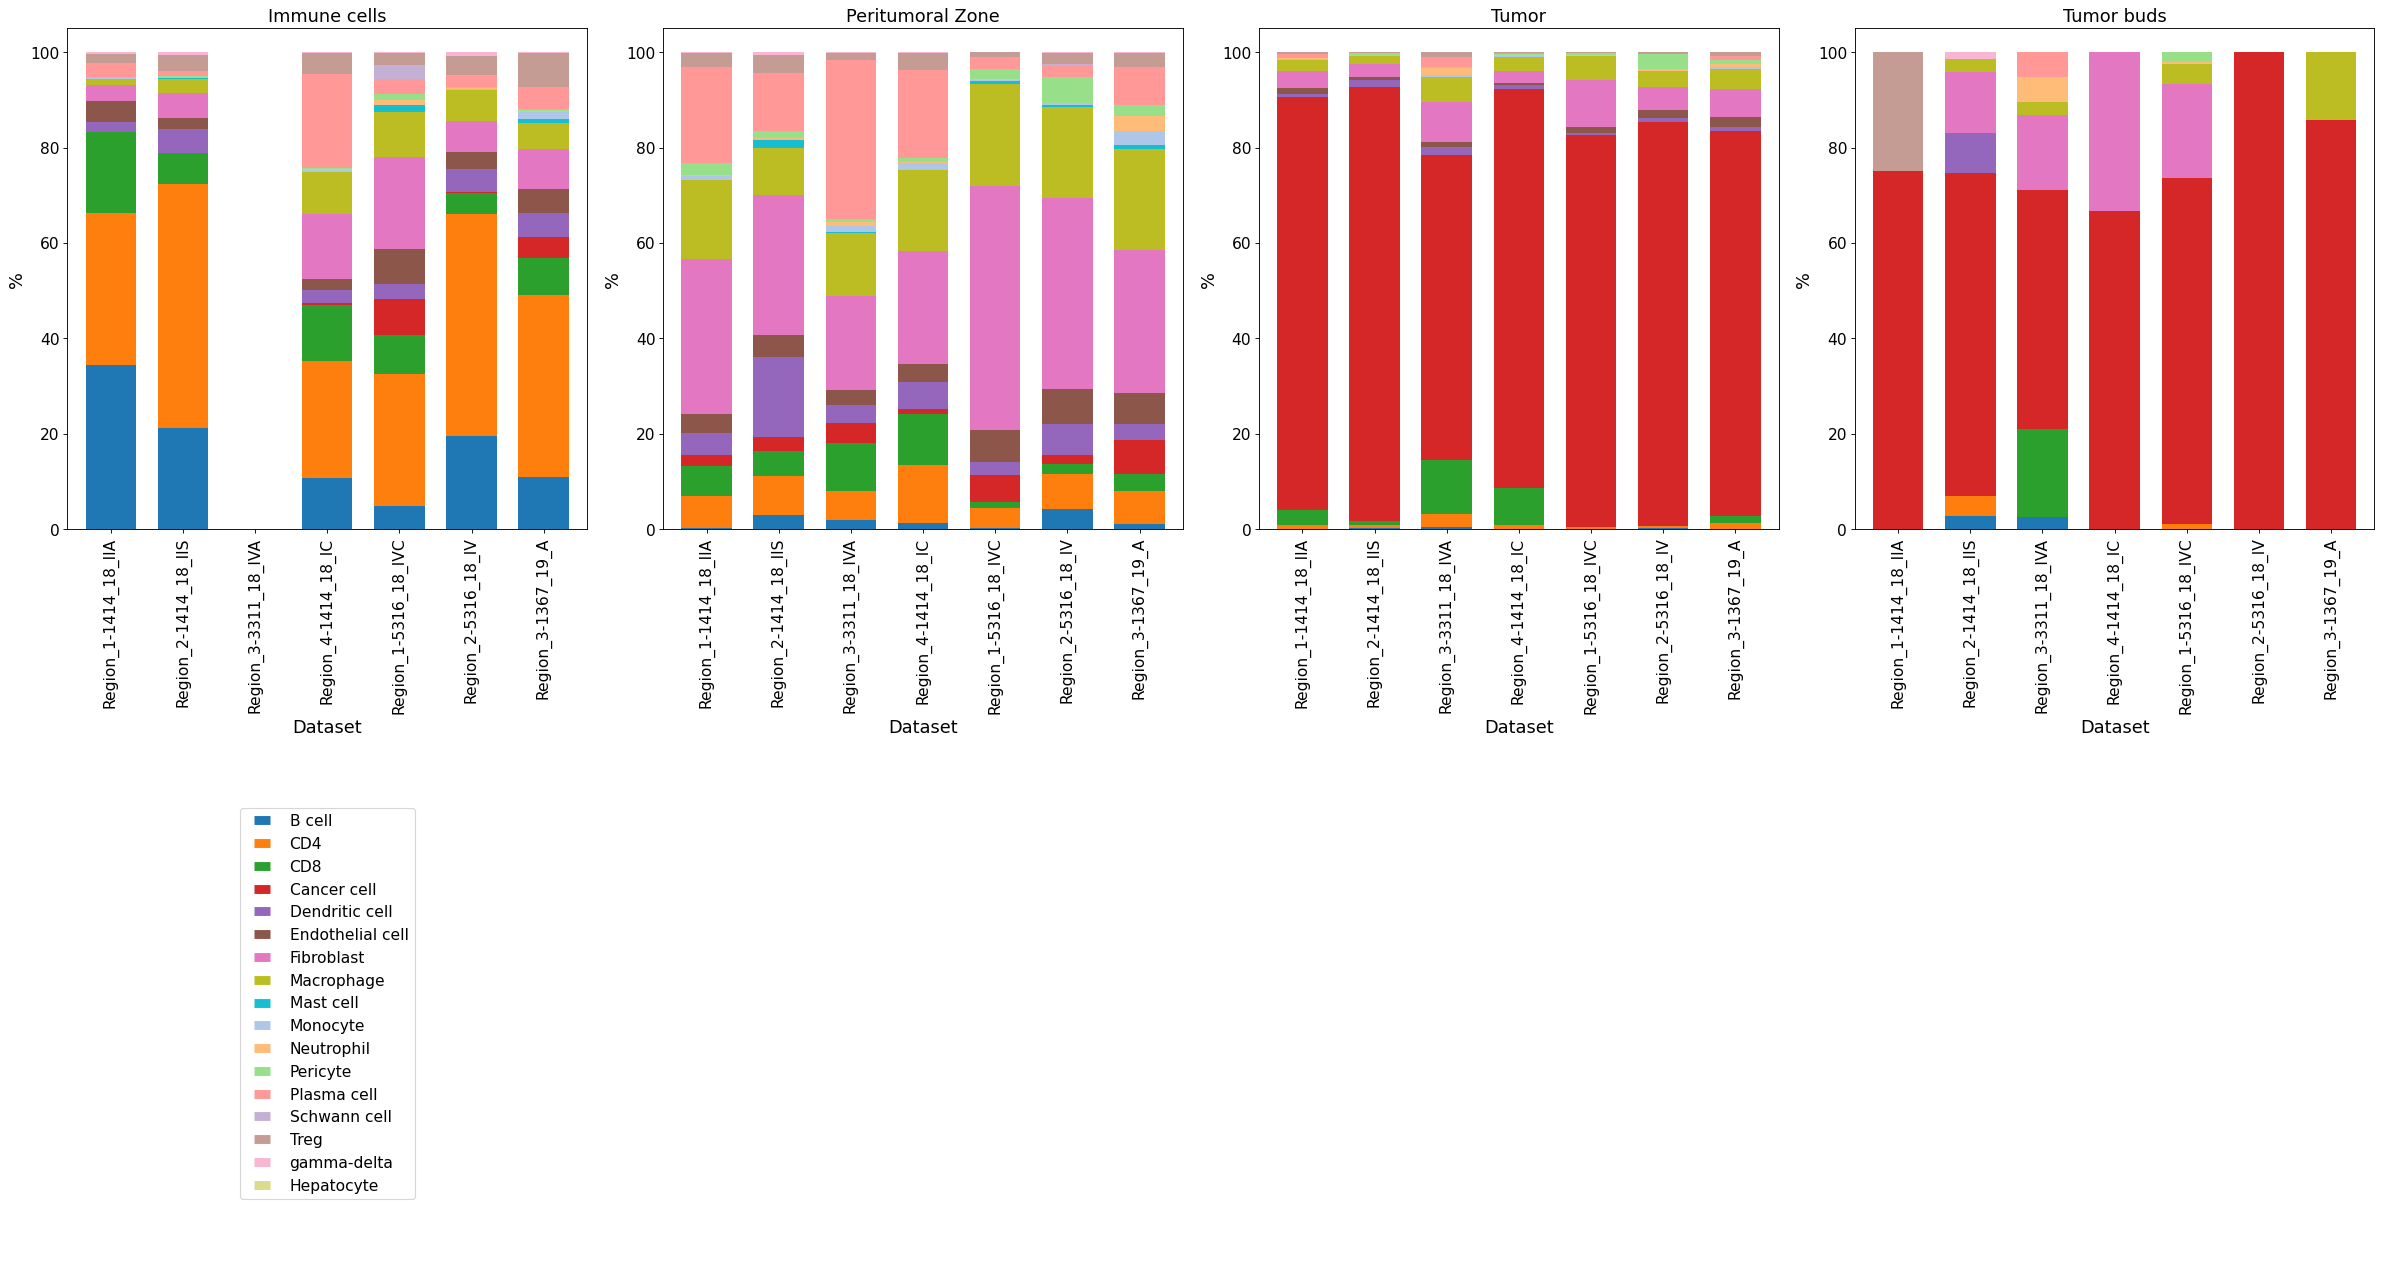

In [16]:
selected_cats = ["Tumor", "Tumor buds", "Peritumoral Zone", "Immune cells"]
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja", geom_values=selected_cats,
    modality="annotations", #max_cols=3,
    plot_type="bar",
    savepath="figures/cellcomp-all_datasets-annotations_Tanja_selected.pdf"
)

### Subsetting data before plotting

Plot only the colon samples:

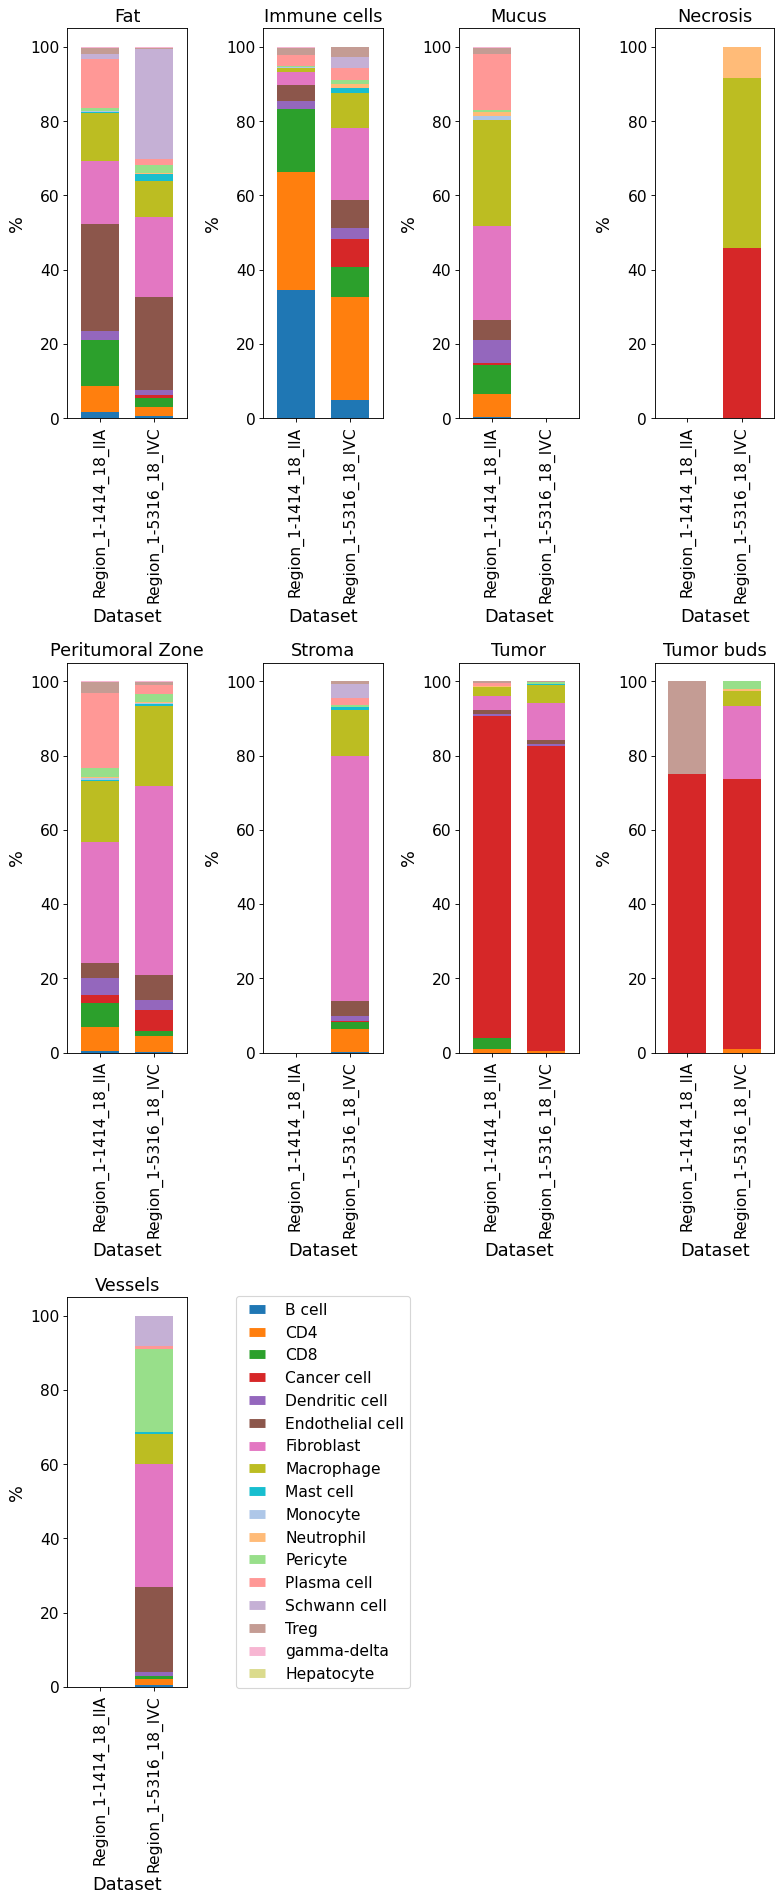

In [18]:
plot_cellular_composition(
    data=exp.query(
        criteria="Tissue == 'Colon'"
        ),
    cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja", modality="annotations",
    plot_type="bar"
)

## Save results

In [20]:
exp.save()

100%|██████████| 7/7 [09:07<00:00, 78.23s/it] 


## Plotting annotations

In [28]:
df = xd.annotations["Tanja"]

In [62]:
xd.sample_id

'Region_3-1367_19_A'

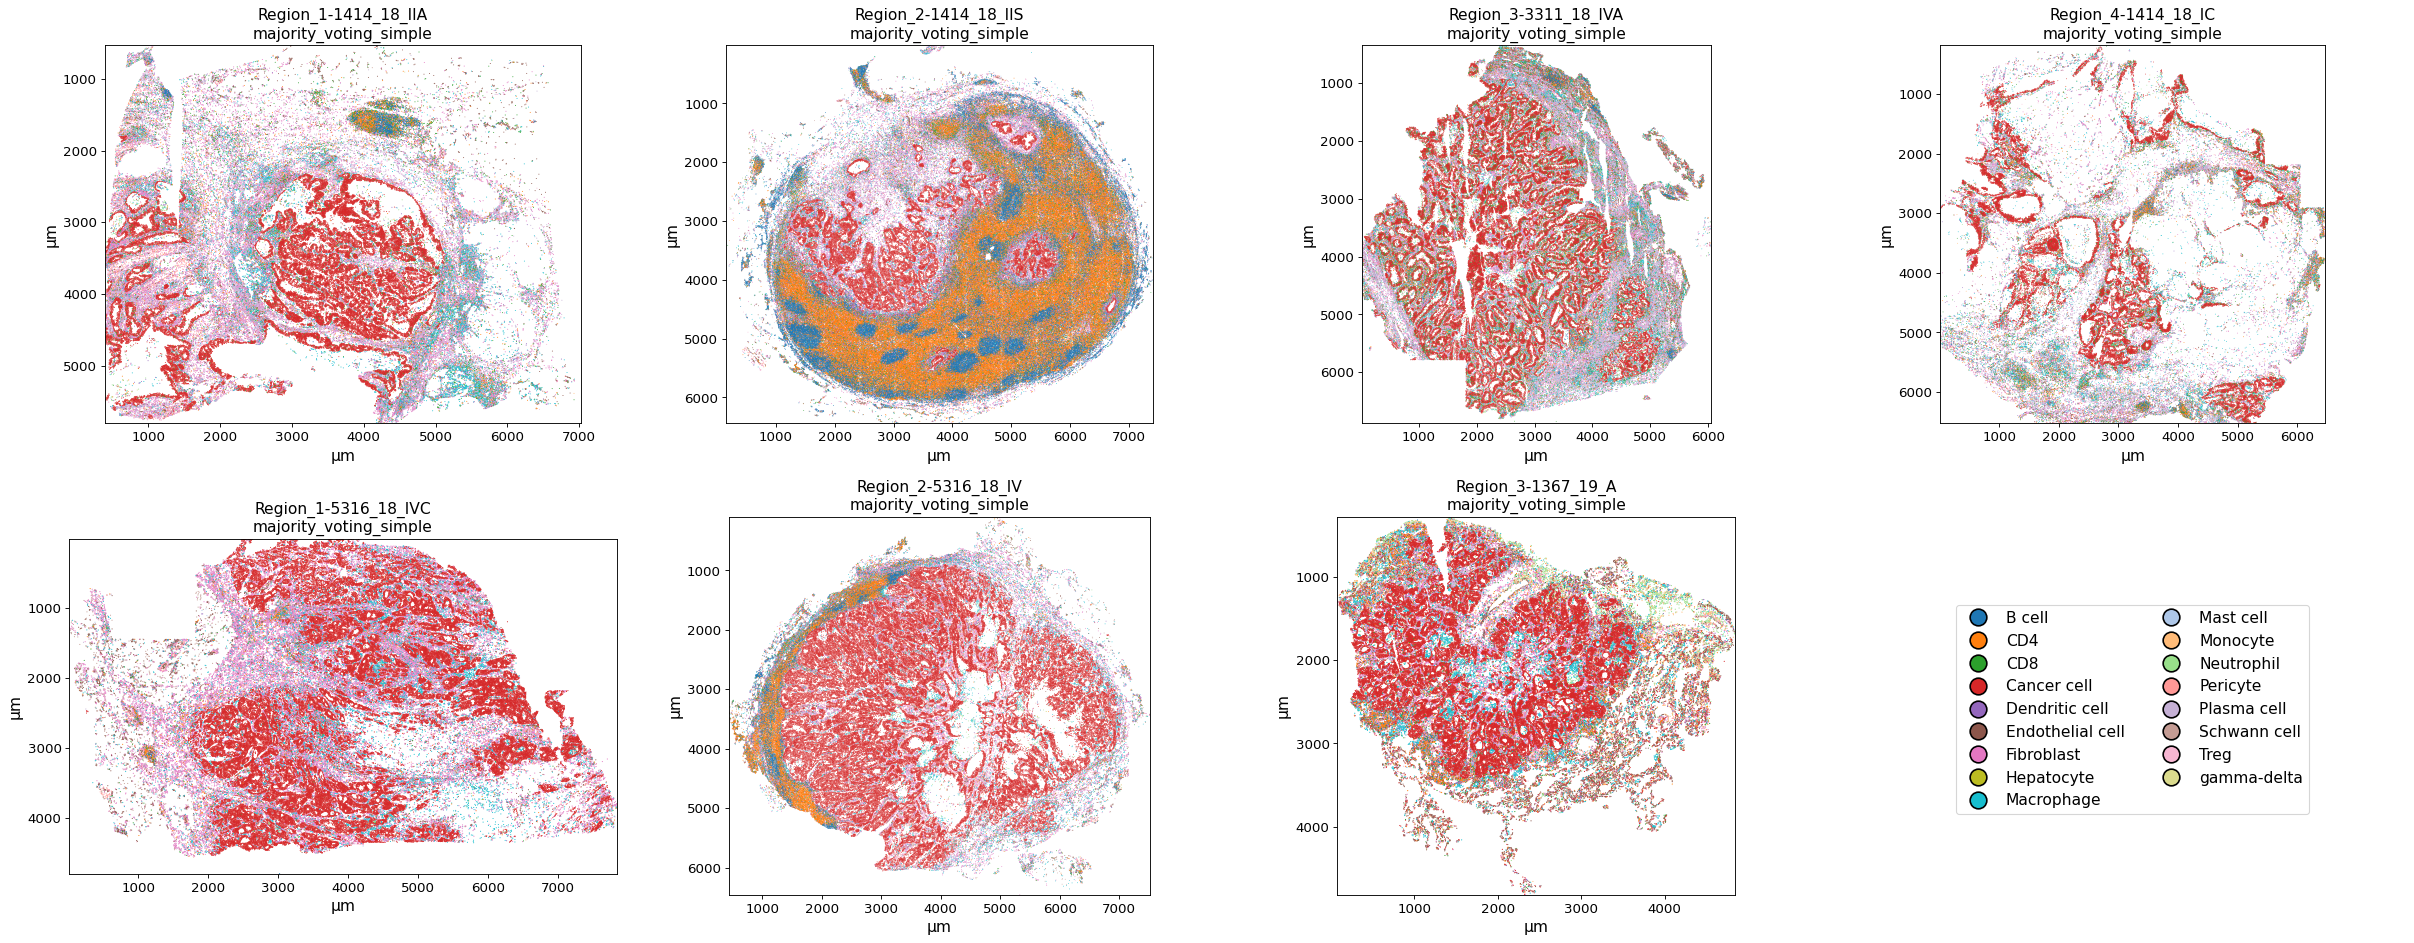

In [ ]:
plot_spatial(exp, cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

In [ ]:
from matplotlib.colors import rgb2hex

def rgb2hex_robust(rgb, scale_to_one: bool, max_value: int = 255):
    """
    Convert RGB values to hex format, ensuring that the values are within the range [0, 1].
    """
    if scale_to_one:
        rgb = [elem / max_value for elem in rgb]
    # Ensure that the values are within the range [0, 1]
    return rgb2hex(rgb)

df = xd.annotations["Tanja"]
hex_colors = [rgb2hex_robust(elem, scale_to_one=True, max_value=255) for elem in df.color]

<Axes: >

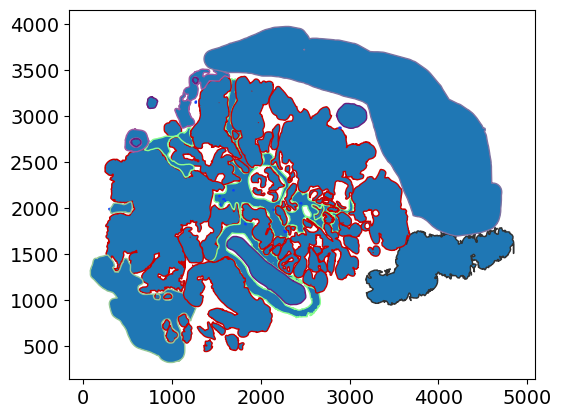

In [55]:
df.plot(edgecolor=hex_colors)

<Axes: >

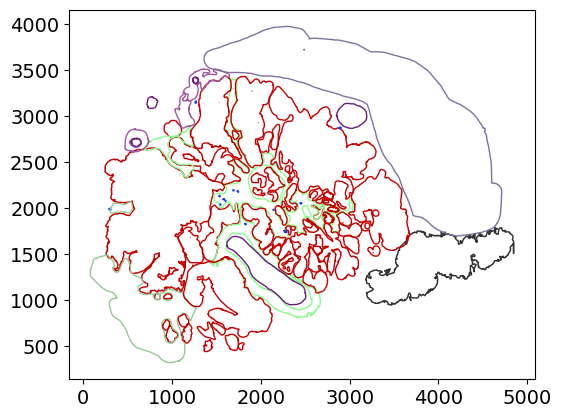

In [65]:
df.plot(edgecolor=hex_colors, facecolor="none")

<Axes: >

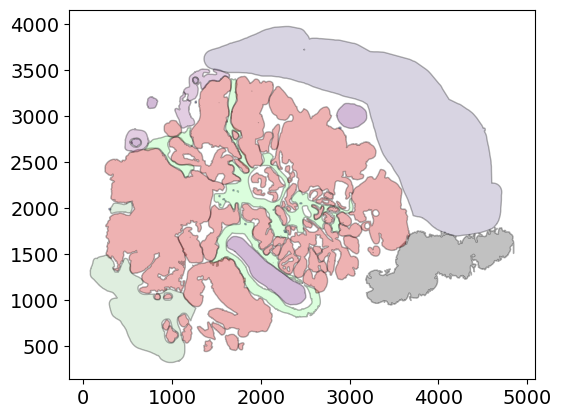

In [58]:
df.plot(color=hex_colors, alpha=0.3, edgecolor="k")

In [ ]:
exp.show(0)

Viewer(camera=Camera(center=(0.0, np.float64(2906.04375), np.float64(3627.1625)), zoom=np.float64(0.02219645290964448), angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, style=<CursorStyle.STANDARD: 'standard'>, size=1.0), dims=Dims(ndim=2, ndisplay=2, order=(0, 1), axis_labels=('0', '1'), rollable=(True, True), range=(RangeTuple(start=np.float64(0.0), stop=np.float64(5812.0875), step=np.float64(0.2125)), RangeTuple(start=np.float64(0.0), stop=np.float64(7254.325), step=np.float64(0.2125))), margin_left=(0.0, 0.0), margin_right=(0.0, 0.0), point=(np.float64(2905.9375), np.float64(3627.1625)), last_used=0), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x17c1d675e10>, <Image layer 'HE' at 0x17b702b90f0>, <Image layer 'panCK' at 0x17c311e0460>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='0003621: Region_1-1

<Axes: >

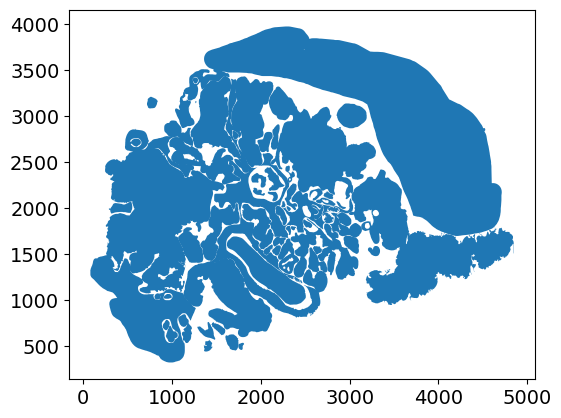

In [29]:
df.geometry.plot()